# Numerical Root Finding Methods
Finding the zero(s)/root(s) to a function is sometimes as easy as setting the function equal to zero and solving for x. But when solving for x becomes complex or even impossible, one can use numerical approximations to identify the roots. Several numerical root finding methods are discussed below. 

## Secant Method
### Background
A secant is a straight line that intersects a function at (at least) two points. The secant method applies a secant and then iteratively adjusts the secant line to eventually approximate the position of the root at a pre-defined level of precision. We start by applying a secant line through our function. It is important that the two points at which the secant cuts the function include the root we try to find. In other words, we must choose the two points $x_1$ and $x_2$ so that $f(x_1) < 0$ and $f(x_2) > 0$ or vice versa. 

Let's illustrate this with function $f(x) = x^3 + 2x^2 + \frac{x}{2}$. We can see that there are three roots. We will try to find the first one with the secant at $x_1=-2$ anbd $x_2=-1$, which satisfies that the sifns for $f(x_1)$ and $f(x_2)$ are different since $f(x_1) = -1$ and $f(x_2) = 0.5$:

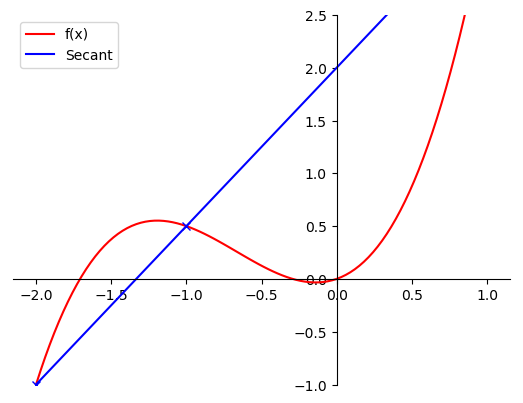

In [12]:
# import required libraries
import numpy as np
from matplotlib import pyplot as plt

#to ignore warnings (in this file warnings related to plots)
import warnings
warnings.filterwarnings("ignore")

#define f(x)
def f(x):
   return x**3 + 2*x**2 + x/2

#create plot
x = np.linspace(-2, 1, 100)
plt.plot(x, f(x), color='red') #f(x)
plt.plot(x,1.5*x+2, color='blue') #secant line
plt.legend(['f(x)','Secant'])
plt.plot(-2, -1, marker='x', c= 'b') #x_1
plt.plot(-1, 0.5, marker='x', c='b') #x_2

#aesthetics: move y axis to origin, remove borders
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['left'].set_position(('data',0))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)

#show
plt.ylim(-1,2.5)
plt.show()

A secant line through two points $(x_1,y_1)$ and $(x_2,y_2)$ is $y-f(x_1) = \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1)$ where $\frac{f(x_2)-f(x_1)}{x_2-x_1}$ is the slope $m$. Keep in mind that eventually the secant will help us identify the root of the function. So our task moves from finding the root of function f(x) to finding the root of the secant. Per definition, our secant evaluates to $y = 0$ at the root. So we substitute $y = 0$ into the secant formula and rearrange it to find the x value of the (secant) root. <br>
$ y-f(x_1) = \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1) $ <br>
$ -f(x_1) = \frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1) $ | $y=0$ <br>
$ -f(x_1)\frac{x_2-x_1}{f(x_2)-f(x_1)} = (x-x_1) $ | multiply bu $1/m$ <br>
$ x = x_1-f(x_1)\frac{x_2-x_1}{f(x_2)-s(x_1)} $ <br>

For our example above, the root of the function is at $x = -2-(-1)\frac{1}{1.5} = -2+\frac{2}{3} = -\frac{4}{3}$.

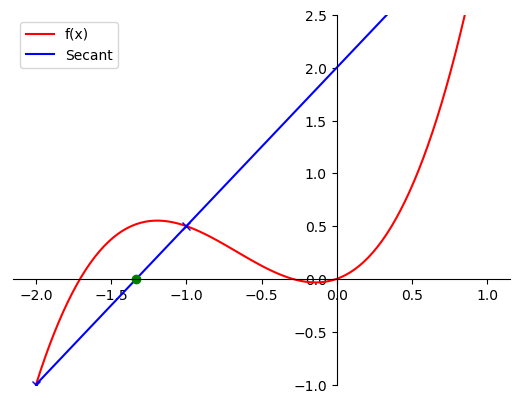

In [15]:
#create plot
x = np.linspace(-2,1,100)
plt.plot(x, f(x), color = 'red') #f(x)
plt.plot(x, 1.5*x+2, color = 'blue') #secant line
plt.legend(['f(x)', 'Secant'])
plt.plot(-2, -1, marker='x', c='b') #x_1
plt.plot(-1, 0.5, marker='x', c='b') #_2
plt.plot(-4/3, 0, marker='o', c= 'g') #root of secant

#aesthetics:move y axist to origin, remove borders
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['left'].set_position(('data',0))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)
plt.ylim(-1,2.5)

#show
plt.show()

The root of the secant is not close to the root of f(x) yet. But we use it to buld a new secant line through the two points at $x_1$ (same as before) and $x_2 = x = -4/3$ (new based on root found in previous iteration). Once more, we find the root of the secant: <br>
$ x = x_1-f(x_1)\frac{x_2-x_1}{f(x_2)-f(x_1)} $ <br>
$ x = -2-(-1)\frac{\frac{-4}{3}-(-2)}{\frac{14}{27}-(-1)} $ | $f(x_2) = \frac{14}{27} $ <br>
$ x = -2+\frac{\frac{2}{3}}{\frac{41}{27}} = -\frac{64}{41} $ 

c:\Users\mbant\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


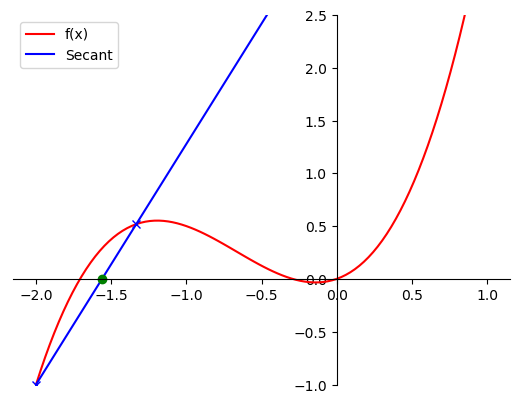

In [10]:
#create plot
x = np.linspace(-2,1,100)
plt.plot(x, f(x), color = 'red') #f(x)
plt.plot(x, 41/18*x+32/9, color = 'blue') #secant line
plt.legend(['f(x)', 'Secant'])
plt.plot(-2, -1, marker='x', c='b') #x_1
plt.plot(-4/3, 14/27, marker='x', c='b') #_2
plt.plot(-64/41, 0, marker='o', c= 'g') #root of secant

#aesthetics:move y axist to origin, remove borders
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['left'].set_position(('data',0))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)

#show
plt.ylim(-1,2.5)
plt.show()

Note how the root of this secant is closer to the root of f(x) than before. We keep redoing this exercise of (1) building the secant throuogh $x_1$ and $x_2$, (2) finding the root x of the secant, (3) replacing $x_2$ with the x value of that root and again (1) building the secant throuogh $x_1$ and $x_2$.... Like this, the root x of the secant will move closer and closer to the root of f(x). We will stop at a certain level of precision $\epsilon$, which is satisfied once $|x-x_2| < \epsilon$. Our approximation for the root of f(x) will be x. Following, the next few iterations of the secant approach for our example with $\epsilon = 0.01$. We approximate the root of f(x) at $x \approx 1.7058... $

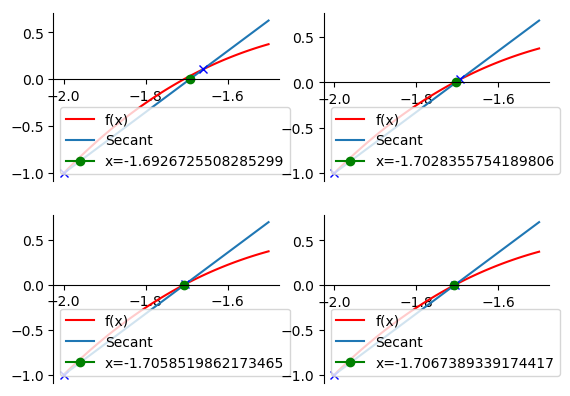

In [41]:
#parameters for secant
def fp(x1,y1,x2,y2):
    return np.array([y1,(y2-y1)/(x2-x1),x1]) #f(x1), slope m, x1

#define secant
def s(x1,y1,x2,y2,x):
    return fp(x1,y1,x2,y2)[1]*(x-fp(x1,y1,x2,y2)[2])+fp(x1,y1,x2,y2)[0]

#algorithm to find root of secant
def secantroot(x1,y1,x2,y2):
    return (x1-s(x1,y1,x2,y2,x1)*(x2-x1)/(s(x1,y1,x2,y2,x2)-s(x1,y1,x2,y2,x1)))

#create plots
x = np.linspace(-2,-1.5,100)
fig, axs = plt.subplots(2,2)

#plot 1
root=-64/41
root=secantroot(-2,-1,root,f(root))
axs[0][0].plot(x,f(x), color = 'red',label ='f(x)')
axs[0][0].plot(x,fp(-2,-1,root,f(root))[1]*(x-fp(-2,-1,root,f(root))[2]) +fp(-2,-1,root,f(root))[0],label = 'Secant')
axs[0][0].plot(-2,-1,marker='x',c='b')
axs[0][0].plot(root,f(root),marker ='x',c='b')
root=secantroot(-2,-1,root,f(root))
axs[0][0].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[0][0].legend()
axs[0][0].spines['bottom'].set_position(('data',0))
axs[0][0].spines['left'].set_position(('outward',0))
axs[0][0].spines['top'].set_visible(False)
axs[0][0].spines['right'].set_visible(False)

#plot 2
axs[0][1].plot(x,f(x), color = 'red',label ='f(x)')
axs[0][1].plot(x,fp(-2,-1,root,f(root))[1]*(x-fp(-2,-1,root,f(root))[2]) +fp(-2,-1,root,f(root))[0],label = 'Secant')
axs[0][1].plot(-2,-1,marker='x',c='b')
axs[0][1].plot(root,f(root),marker ='x',c='b')
root=secantroot(-2,-1,root,f(root))
axs[0][1].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[0][1].legend()
axs[0][1].spines['bottom'].set_position(('data',0))
axs[0][1].spines['left'].set_position(('outward',0))
axs[0][1].spines['top'].set_visible(False)
axs[0][1].spines['right'].set_visible(False)

#plot 3
axs[1][0].plot(x,f(x), color = 'red',label ='f(x)')
axs[1][0].plot(x,fp(-2,-1,root,f(root))[1]*(x-fp(-2,-1,root,f(root))[2]) +fp(-2,-1,root,f(root))[0],label = 'Secant')
axs[1][0].plot(-2,-1,marker='x',c='b')
axs[1][0].plot(root,f(root),marker ='x',c='b')
root=secantroot(-2,-1,root,f(root))
axs[1][0].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[1][0].legend()
axs[1][0].spines['bottom'].set_position(('data',0))
axs[1][0].spines['left'].set_position(('outward',0))
axs[1][0].spines['top'].set_visible(False)
axs[1][0].spines['right'].set_visible(False)

#plot 4
axs[1][1].plot(x,f(x), color = 'red',label ='f(x)')
axs[1][1].plot(x,fp(-2,-1,root,f(root))[1]*(x-fp(-2,-1,root,f(root))[2]) +fp(-2,-1,root,f(root))[0],label = 'Secant')
axs[1][1].plot(-2,-1,marker='x',c='b')
axs[1][1].plot(root,f(root),marker ='x',c='b')
root=secantroot(-2,-1,root,f(root))
axs[1][1].plot(root,0,marker='o',c='g', label = "x="+str(root))
axs[1][1].legend()
axs[1][1].spines['bottom'].set_position(('data',0))
axs[1][1].spines['left'].set_position(('outward',0))
axs[1][1].spines['top'].set_visible(False)
axs[1][1].spines['right'].set_visible(False)

#hide plot 4 as change in root is already below epsilon when moving from plot 2 to plot 3
#fig.delaxes(axs[1][1])

### Implementation
We estimate the root of a function f(x) within the interval $[x_1,x_2]$ under the condition that $f(x_1) < 0$ and $f(x_2) > 0$ by finding root of the secant line through $(x_1,f(x_1))$ and $(x_2,f(x_2))$ via $$(1) \ x = x_1-f(x_1)\frac{x_2-x_1}{f(x_2)-f(x_1)} $$
We keep finding the root x by replacing the point $(x_2,f(x_2))$ with the previously found x until $abs(x-x_2) < \epsilon$ where $\epsilon$ is the desired level of accuracy. The alrogithm is implemented in the following code.

_Remeber: We can also estimate the root under the condition that $f(x_1) > 0$ and $f(x_2) < 0$. The only difference is that we must replace the point $(x_1,f(x_1))$ with x until $abs(x-x_1) < \epsilon$. Or alternatively, simply switch the values of $(x_1,f(x_1))$ and $(x_2,f(x_2))$. The code below handles this case as well._

In [35]:
def Secant(fcoefficients, x1, x2, epsilon, maxiterations):
    #Description of function arguments
    ## fcoefficients: An array of coefficients describing the function for which the root shall be found. For example, fcoefficients for f(x)=x^3+2x^2+x/2 would be [1,2,1/2,0].
    ## x1, x2: bounds of the interval containing the root
    ## espilon: desired level of accuracy, exit condition
    ## maxiterations: maximum number of iterations to find the solution, exit condition to avoid endless loop

    #initialize f(x1) and f(x2)
    fx1=0; fx2=0

    #find f(x1) and f(x2)
    i=len(fcoefficients)
    for coefficient in fcoefficients:
        fx1 += coefficient*x1**(i-1)
        fx2 += coefficient*x2**(i-1)
        i -= 1

    #take care of case  f(x_1) > 0 and f(x_2) < 0 by switching (x1,f(x1)) and (x2,f(x2))
    if fx1>0 and fx2<0:
        x2copy=x2
        fx2copy=fx2
        x2=x1
        fx2=fx1
        x1=x2copy
        fx1=fx2copy

    #secant method
    j=1;x=epsilon*2 #initialize variables
    while j<=maxiterations: #while loop
        #find root of secant
        x = x1-fx1*(x2-x1)/(fx2-fx1)

        #exit condition
        if abs(x-x2) < epsilon:
            break

        #reassign x and f(x) to x2 and fx2
        x2=x
        #find fx2
        fx2=0
        i=len(fcoefficients)
        for coefficient in fcoefficients:
            fx2 += coefficient*x2**(i-1)
            i -= 1

    return x

For our example above with $f(x) = x^3 + 2x^2 + \frac{x}{2}$, $x_1=-2$, $x_2=-1$ and $\epsilon =0.01$ we get:

In [23]:
Secant(np.array([1,2,1/2,0]),-1,-2,0.01,100)

-1.7058519862173465

### Advantages

### Disadvantages



## Bisection Method
### Background
### Implementation
### Advantages
### Disadvantages

## Newton-Raphson Method
### Background
### Implementation
### Advantages
### Disadvantages

### Implementation
### Example
### Advantages
### Disadvantages